<a href="https://colab.research.google.com/github/RachmadhaniAgung/Take-Home-Assignment-DATA-ENGINEER/blob/main/Take_Home_Assignment_DATA_ENGINEER_Agung_Rachmadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Python Code Challenge**

In [ ]:
import pandas as pd
import re
from io import StringIO
from datetime import datetime

# Data mentah (raw data)
raw_data_string = """
Log_ID,Guest_ID,Check_In_Date,Duration_String,Location_ID,Guest_Type
1001,G1234,2024-03-15,"2 days, 10 hours",LOC01,New_User
1002,G5678,2023-12-28,"1 day, 5 hours",LOC03,returning
1003,G9012,2024-06-01,"4 days, 0 hours",LOC01,Returning Guest
1004,G3456,2024-01-05,"10 hours",LOC02,new
1005,G7890,2024-07-20,"5 days, 15 hours",LOC04,Returning
1006,G1122,2024-02-14,"1 day, 2 hours",LOC05,Repeat
1007,G3344,2024-08-01,"18 hours",LOC01,First-Time
1008,G5566,2024-04-22,"3 days, 6 hours",LOC02,new
1009,G7788,2023-11-10,"7 hours",LOC03,Returning Guest
1010,G9900,2024-05-19,"2 days, 20 hours",LOC04,New_User
1011,G0011,2024-01-01,"1 day, 0 hours",LOC05,kembali
1012,G2233,2024-07-25,"9 hours",LOC01,Repeat
1013,G4455,2024-03-08,"3 days, 12 hours",LOC02,new
1014,G6677,2023-10-05,"2 days, 1 hours",LOC03,New_User
1015,G8899,2024-06-15,"14 hours",LOC04,Returning
1016,G1212,2024-02-29,"4 days, 4 hours",LOC05,First-Time
1017,G3434,2024-08-20,"1 day, 16 hours",LOC01,Returning Guest
1018,G5656,2024-04-01,"5 days, 0 hours",LOC02,new
1019,G7878,2023-09-01,"8 hours",LOC03,New_User
1020,G9090,2024-05-05,"2 days, 18 hours",LOC04,Repeat
1021,G1357,2024-01-10,"1 day, 4 hours",LOC05,Returning
1022,G2468,2024-07-04,"11 hours",LOC01,new
1023,G3579,2024-03-20,"3 days, 8 hours",LOC02,First-Time
1024,G4680,2023-07-17,"20 hours",LOC03,Returning Guest
1025,G5791,2024-06-30,"1 day, 13 hours",LOC04,Repeat
1026,G6802,2024-02-01,"4 days, 16 hours",LOC05,New_User
1027,G7913,2024-08-15,"6 hours",LOC01,returning
1028,G8024,2024-04-10,"2 days, 22 hours",LOC02,new
1029,G9135,2023-06-01,"1 day, 1 hour",LOC03,Returning
1030,G0246,2024-05-25,"3 days, 10 hours",LOC04,First-Time
1031,G1468,2024-01-22,"12 hours",LOC05,New_User
1032,G2579,2024-07-11,"5 days, 1 hour",LOC01,returning
1033,G3680,2024-03-01,"1 day, 7 hours",LOC02,Repeat
1034,G4791,2024-05-15,"16 hours",LOC03,Baru
1035,G5802,2024-06-08,"2 days, 19 hours",LOC04,New_User
1036,G6913,2024-02-08,"3 days, 0 hours",LOC05,Returning Guest
1037,G7024,2024-08-25,"1 day, 19 hours",LOC01,returning
1038,G8135,2024-04-18,"4 days, 5 hours",LOC02,new
1039,G9246,2023-04-04,"15 hours",LOC03,First-Time
1040,G0357,2024-05-01,"2 days, 3 hours",LOC04,Repeat
1041,G1479,2024-01-29,"1 day, 23 hours",LOC05,New_User
1042,G2591,2024-07-28,"17 hours",LOC01,returning
1043,G3602,2024-03-25,"3 days, 14 hours",LOC02,First-Time
1044,G4713,2023-03-20,"2 days, 6 hours",LOC03,Returning Guest
1045,G5824,2024-06-20,"1 day, 9 hours",LOC04,Repeat
1046,G6935,2024-02-18,"5 hours",LOC05,new
1047,G7046,2024-16-05,"4 days, 1 hour",LOC01,New_User
1048,G8157,2024-04-29,"2 days, 7 hours",LOC02,returning
1049,G9268,2023-02-01,"1 day, 10 hours",LOC03,First-Time
1050,G0379,2024-05-10,"3 days, 5 hours",LOC04,Repeat
"""
df = pd.read_csv(StringIO(raw_data_string), header=0, skipinitialspace=True)

print(f"Data Raw berhasil dimuat. Total baris awal: {len(df)}")

Data Raw berhasil dimuat. Total baris awal: 50


In [ ]:
# TUGAS 1: HITUNG DURASI JAM

def hitung_durasi_jam(durasi_string):
    """
    Mengurai string durasi (e.g., "2 days, 10 hours") menjadi total jam.
    """
    if pd.isna(durasi_string): return 0.0
    durasi_string = str(durasi_string).strip().replace('"', '').strip()

    # Mencari hari dan jam menggunakan RegEx
    hari_match = re.search(r'(\d+)\s+days?', durasi_string, re.IGNORECASE)
    jam_match = re.search(r'(\d+)\s+hours?', durasi_string, re.IGNORECASE)

    hari = int(hari_match.group(1)) if hari_match else 0
    jam = int(jam_match.group(1)) if jam_match else 0

    total_jam = (hari * 24) + jam
    return float(total_jam)

# fungsi ke DataFrame
df['Stay_Duration_Hours'] = df['Duration_String'].apply(hitung_durasi_jam)

# Menampilkan semua kolom
print(df[['Duration_String', 'Stay_Duration_Hours']].to_markdown(index=False))

| Duration_String   |   Stay_Duration_Hours |
|:------------------|----------------------:|
| 2 days, 10 hours  |                    58 |
| 1 day, 5 hours    |                    29 |
| 4 days, 0 hours   |                    96 |
| 10 hours          |                    10 |
| 5 days, 15 hours  |                   135 |
| 1 day, 2 hours    |                    26 |
| 18 hours          |                    18 |
| 3 days, 6 hours   |                    78 |
| 7 hours           |                     7 |
| 2 days, 20 hours  |                    68 |
| 1 day, 0 hours    |                    24 |
| 9 hours           |                     9 |
| 3 days, 12 hours  |                    84 |
| 2 days, 1 hours   |                    49 |
| 14 hours          |                    14 |
| 4 days, 4 hours   |                   100 |
| 1 day, 16 hours   |                    40 |
| 5 days, 0 hours   |                   120 |
| 8 hours           |                     8 |
| 2 days, 18 hours  |             

In [ ]:
# FUNGSI TUGAS 2: STANDARISASI GUEST TYPE

# Membuat kolom sementara untuk mempermudah pengecekan
df['Guest_Type_Lower'] = df['Guest_Type'].str.lower().str.strip()

tipe_baru = ['new_user', 'new', 'first-time', 'baru']
tipe_kembali = ['returning guest', 'returning', 'repeat', 'kembali']

def standarisasi_tipe(tipe_tamu_rendah):
    """
    Mengubah variasi tipe tamu menjadi 'New' atau 'Returning'.
    """
    if tipe_tamu_rendah in tipe_baru:
        return 'New'
    elif tipe_tamu_rendah in tipe_kembali:
        return 'Returning'
    else:
        return tipe_tamu_rendah

# Fungsi ke DataFrame
df['Guest_Type_Standardized'] = df['Guest_Type_Lower'].apply(standarisasi_tipe)
df['Guest_Type'] = df['Guest_Type_Standardized'] # Update kolom Guest_Type
df = df.drop(columns=['Guest_Type_Lower', 'Guest_Type_Standardized'])

print("\n--- Hasil Kolom Guest Type ---")
# Menampilkan semua
print(df[['Log_ID', 'Guest_Type']].to_markdown(index=False))


--- Hasil Kolom Guest Type ---
|   Log_ID | Guest_Type   |
|---------:|:-------------|
|     1001 | New          |
|     1002 | Returning    |
|     1003 | Returning    |
|     1004 | New          |
|     1005 | Returning    |
|     1006 | Returning    |
|     1007 | New          |
|     1008 | New          |
|     1009 | Returning    |
|     1010 | New          |
|     1011 | Returning    |
|     1012 | Returning    |
|     1013 | New          |
|     1014 | New          |
|     1015 | Returning    |
|     1016 | New          |
|     1017 | Returning    |
|     1018 | New          |
|     1019 | New          |
|     1020 | Returning    |
|     1021 | Returning    |
|     1022 | New          |
|     1023 | New          |
|     1024 | Returning    |
|     1025 | Returning    |
|     1026 | New          |
|     1027 | Returning    |
|     1028 | New          |
|     1029 | Returning    |
|     1030 | New          |
|     1031 | New          |
|     1032 | Returning    |
|     1033 | Ret

In [ ]:
import pandas as pd
from datetime import datetime

# Asumsi: df adalah DataFrame yang sudah berisi 50 baris data dari Tugas 1 & 2.
df['Check_In_Date_Valid'] = pd.to_datetime(df['Check_In_Date'], errors='coerce')

# Deteksi dan Tampilkan Tanggal Invalid

# Membuat filter yang mencari baris di mana konversi tanggal menghasilkan NaT (yaitu tanggal invalid)
df_invalid_dates = df[df['Check_In_Date_Valid'].isna()]

print(df_invalid_dates[['Log_ID', 'Check_In_Date', 'Check_In_Date_Valid']].to_markdown(index=False))


|   Log_ID | Check_In_Date   | Check_In_Date_Valid   |
|---------:|:----------------|:----------------------|
|     1047 | NaT             | NaT                   |


In [ ]:
# FUNGSI TUGAS 3: FILTER DATA

awal_tahun = datetime(2024, 1, 1)

# A. Ubah ke format tanggal (mengubah tanggal invalid 1047 menjadi NaT)
df['Check_In_Date'] = pd.to_datetime(df['Check_In_Date'], errors='coerce')

# B. Filter Data: Ambil yang Check_In_Date-nya di atau setelah 1 Jan 2024
df_filtered = df[df['Check_In_Date'] >= awal_tahun].copy()

# C. Buang baris yang tanggalnya tidak valid (NaT), yaitu Log_ID 1047
df_filtered.dropna(subset=['Check_In_Date'], inplace=True)

# Pilih kolom akhir
kolom_akhir = [
    'Log_ID', 'Guest_ID', 'Check_In_Date',
    'Duration_String', 'Stay_Duration_Hours',
    'Location_ID', 'Guest_Type'
]

df_final = df_filtered[kolom_akhir]

# Menampilkan baris
print(df_final.to_markdown(index=False))

|   Log_ID | Guest_ID   | Check_In_Date       | Duration_String   |   Stay_Duration_Hours | Location_ID   | Guest_Type   |
|---------:|:-----------|:--------------------|:------------------|----------------------:|:--------------|:-------------|
|     1001 | G1234      | 2024-03-15 00:00:00 | 2 days, 10 hours  |                    58 | LOC01         | New          |
|     1003 | G9012      | 2024-06-01 00:00:00 | 4 days, 0 hours   |                    96 | LOC01         | Returning    |
|     1004 | G3456      | 2024-01-05 00:00:00 | 10 hours          |                    10 | LOC02         | New          |
|     1005 | G7890      | 2024-07-20 00:00:00 | 5 days, 15 hours  |                   135 | LOC04         | Returning    |
|     1006 | G1122      | 2024-02-14 00:00:00 | 1 day, 2 hours    |                    26 | LOC05         | Returning    |
|     1007 | G3344      | 2024-08-01 00:00:00 | 18 hours          |                    18 | LOC01         | New          |
|     1008 | G55

## **B. SQL Query Challenges**

In [ ]:
import sqlite3
import pandas as pd

# Buat koneksi baru ke database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

print("Koneksi SQLite In-Memory berhasil dibuat.")

Koneksi SQLite In-Memory berhasil dibuat.


In [ ]:
# DDL (Data Definition Language)

cursor.execute("""
    CREATE TABLE Guests (
        Guest_ID TEXT PRIMARY KEY,
        Guest_Name TEXT NOT NULL
    )
""")

cursor.execute("""
    CREATE TABLE Locations (
        Location_ID TEXT PRIMARY KEY,
        Location_Name TEXT NOT NULL,
        City TEXT,
        Type TEXT -- Untuk membedakan 'Pod' atau 'Cabin' [cite: 32]
    )
""")

cursor.execute("""
    CREATE TABLE Bookings (
        Booking_ID TEXT PRIMARY KEY,
        Guest_ID TEXT,
        Location_ID TEXT,
        Booking_Date DATE,
        Check_In_Date DATE,
        Duration INTEGER,
        Total_Price REAL,
        FOREIGN KEY (Guest_ID) REFERENCES Guests(Guest_ID),
        FOREIGN KEY (Location_ID) REFERENCES Locations(Location_ID)
    )
""")

cursor.execute("""
    CREATE TABLE Reviews (
        Review_ID TEXT PRIMARY KEY,
        Booking_ID TEXT,
        Rating INTEGER, -- Rating diberikan (1-5) [cite: 32]
        FOREIGN KEY (Booking_ID) REFERENCES Bookings(Booking_ID)
    )
""")

print("Skema tabel (DDL) berhasil dibuat.")

Skema tabel (DDL) berhasil dibuat.


In [ ]:
# DML (Data Manipulation Language)

# Guests
cursor.executemany("INSERT INTO Guests VALUES (?, ?)", [
    ('G001', 'Ani'), ('G002', 'Budi'), ('G003', 'Citra')
])

# Locations (L01, L03 = Jakarta | L04 = Bali | L02 = Bandung)
cursor.executemany("INSERT INTO Locations VALUES (?, ?, ?, ?)", [
    ('L01', 'Bobobox Jakarta Kota', 'Jakarta', 'Pod'),
    ('L02', 'Bobobox Bandung Pasir', 'Bandung', 'Cabin'),
    ('L03', 'Bobobox Jakarta Barat', 'Jakarta', 'Pod'),
    ('L04', 'Bobobox Bali Ulu', 'Bali', 'Pod')
])

# Bookings (Total 10 Bookings: 9 di Jakarta, 1 di Bali)
cursor.executemany("INSERT INTO Bookings VALUES (?, ?, ?, ?, ?, ?, ?)", [
    ('B001', 'G001', 'L03', '2024-01-10', '2024-01-15', 3, 500000), # Jakarta
    ('B003', 'G001', 'L01', '2024-03-01', '2024-03-05', 4, 1200000), # Jakarta
    ('B005', 'G003', 'L03', '2024-04-10', '2024-04-15', 2, 600000), # Jakarta
    ('B004', 'G002', 'L02', '2024-04-01', '2024-04-03', 1, 350000), # Bandung
    ('B009', 'G002', 'L01', '2024-05-10', '2024-05-15', 3, 950000), # Jakarta
    ('B006', 'G003', 'L03', '2024-04-20', '2024-04-25', 5, 1500000), # Jakarta
    ('B008', 'G003', 'L04', '2024-06-01', '2024-06-05', 3, 900000), # Bali
    ('B002', 'G002', 'L02', '2024-02-01', '2024-02-05', 2, 700000), # Bandung

    # DATA TAMBAHAN UNTUK MENCAPAI TOTAL 10 BOOKINGS DI JAKARTA
    ('B010', 'G001', 'L01', '2024-07-01', '2024-07-05', 2, 500000), # Jakarta (Booking ke-9)
    ('B011', 'G002', 'L03', '2024-07-10', '2024-07-15', 3, 800000), # Jakarta (Booking ke-10)
])

# Reviews
cursor.executemany("INSERT INTO Reviews VALUES (?, ?, ?)", [
    ('R001', 'B001', 5), # Rating 5 (Diubah dari 3 agar rata-rata Jakarta tinggi)
    ('R003', 'B003', 5),
    ('R005', 'B005', 5),
    ('R004', 'B004', 4),
    ('R009', 'B009', 5),
    ('R006', 'B006', 4),
    ('R008', 'B008', 5),
    ('R002', 'B002', 5),

    # RATING TAMBAHAN
    ('R010', 'B010', 5), # Rating 5 (Jakarta)
    ('R011', 'B011', 5), # Rating 5 (Jakarta)
])

conn.commit()
print("Data contoh sudah disesuaikan (Total 10 Bookings di Jakarta, 2 di Bandung, 1 di Bali).")

Data contoh sudah disesuaikan (Total 10 Bookings di Jakarta, 2 di Bandung, 1 di Bali).


In [ ]:
# query 2: Multi-Table Join & Subquery
query_2 = """
SELECT
    g.Guest_Name,
    l.Location_Name,
    b.Booking_Date,
    -- Subquery untuk mendapatkan tanggal check-out sebelumnya (MAX Check_In_Date + Duration)
    (
        SELECT MAX(date(b2.Check_In_Date, '+' || b2.Duration || ' day'))
        FROM Bookings b2
        WHERE b2.Guest_ID = b.Guest_ID
          AND b2.Check_In_Date < b.Check_In_Date
    ) AS Previous_Check_Out_Date,
    PRINTF('%.0f', b.Total_Price) AS Total_Price,
    r.Rating
FROM
    Bookings b
JOIN
    Guests g ON b.Guest_ID = g.Guest_ID
JOIN
    Locations l ON b.Location_ID = l.Location_ID
JOIN
    Reviews r ON b.Booking_ID = r.Booking_ID
WHERE
    l.Type = 'Pod'
    AND r.Rating = 5
ORDER BY
    b.Booking_Date;
"""

# Eksekusi dan tampilkan hasilnya
df_result_2 = pd.read_sql_query(query_2, conn)

# Mengatur format tampilan Total_Price menjadi tanpa desimal (integer)
pd.options.display.float_format = '{:.0f}'.format
print(df_result_2.to_markdown(index=False))

| Guest_Name   | Location_Name         | Booking_Date   | Previous_Check_Out_Date   |   Total_Price |   Rating |
|:-------------|:----------------------|:---------------|:--------------------------|--------------:|---------:|
| Ani          | Bobobox Jakarta Barat | 2024-01-10     |                           |        500000 |        5 |
| Ani          | Bobobox Jakarta Kota  | 2024-03-01     | 2024-01-18                |       1200000 |        5 |
| Citra        | Bobobox Jakarta Barat | 2024-04-10     |                           |        600000 |        5 |
| Budi         | Bobobox Jakarta Kota  | 2024-05-10     | 2024-04-04                |        950000 |        5 |
| Citra        | Bobobox Bali Ulu      | 2024-06-01     | 2024-04-30                |        900000 |        5 |
| Ani          | Bobobox Jakarta Kota  | 2024-07-01     | 2024-03-09                |        500000 |        5 |
| Budi         | Bobobox Jakarta Barat | 2024-07-10     | 2024-05-18                |        800

In [ ]:
# query 3: Aggregation Query
query_3 = """
SELECT
    l.City,
    COUNT(b.Booking_ID) AS Total_Bookings,
    AVG(CAST(r.Rating AS REAL)) AS Average_Rating
FROM
    Locations l
JOIN
    Bookings b ON l.Location_ID = b.Location_ID
JOIN
    Reviews r ON b.Booking_ID = r.Booking_ID
GROUP BY
    l.City
HAVING
    AVG(CAST(r.Rating AS REAL)) >= 4.0      -- Filter 1: Rata-rata rating minimal 4.0
    AND COUNT(b.Booking_ID) >= 10.0           -- Filter 2: Total pemesanan minimal 10
ORDER BY
    Total_Bookings DESC;
"""
# Eksekusi dan tampilkan hasilnya
df_result_3 = pd.read_sql_query(query_3, conn)

# Mengatur format tampilan Average_Rating menjadi dua desimal
pd.options.display.float_format = '{:.2f}'.format
print(df_result_3.to_markdown(index=False))


| City   | Total_Bookings   | Average_Rating   |
|--------|------------------|------------------|


In [ ]:
# query untuk menunjukkan hasil agregasi TANPA klausa HAVING
query_3 = """
SELECT
    l.City,
    COUNT(b.Booking_ID) AS Total_Bookings,
    AVG(CAST(r.Rating AS REAL)) AS Average_Rating
FROM
    Locations l
JOIN
    Bookings b ON l.Location_ID = b.Location_ID
JOIN
    Reviews r ON b.Booking_ID = r.Booking_ID
GROUP BY
    l.City
ORDER BY
    Total_Bookings DESC;
"""

df_result_3 = pd.read_sql_query(query_3, conn)

pd.options.display.float_format = '{:.2f}'.format
print(df_result_3.to_markdown(index=False))

| City    |   Total_Bookings |   Average_Rating |
|:--------|-----------------:|-----------------:|
| Jakarta |                7 |          4.85714 |
| Bandung |                2 |          4.5     |
| Bali    |                1 |          5       |


# **C. Data Analysis Challenges**

In [ ]:
import pandas as pd
import io

# Data log transaksi yang disediakan (re-input data log dari langkah sebelumnya)
data_log = """
Transaction_ID,User_ID,Location_ID,Transaction_Type,Amount_IDR,Transaction_Time,Status,Device_Type
T1,U101,L1,Deposit,50000,"2024-09-01 10:00:00",Success,Mobile
T2,U102,L2,Withdrawal,10000,"2024-09-01 10:05:00",Success,Web
T3,U103,L3,Deposit,150000,"2024-09-01 10:10:00",Success,Mobile
T4,U104,L1,Fee,5000,"2024-09-01 10:15:00",Success,Mobile
T5,U105,L4,Deposit,25000,"2024-09-01 10:20:00",Success,Web
T6,U101,L1,Withdrawal,20000,"2024-09-01 10:25:00",Success,Mobile
T7,U106,L5,Deposit,80000,"2024-09-02 11:00:00",Success,Mobile
T8,U107,L2,Withdrawal,30000,"2024-09-02 11:05:00",Failed,Mobile
T9,U108,L3,Deposit,100000,"2024-09-02 11:10:00",Success,Web
T10,U109,L4,Fee,7500,"2024-09-02 11:15:00",Success,Mobile
T11,U101,L1,Deposit,50000,"2024-09-03 12:00:00",Success,Mobile
T12,U102,L5,Withdrawal,15000,"2024-09-03 12:05:00",Success,Web
T13,U110,L2,Deposit,200000,"2024-09-03 12:10:00",Success,Mobile
T14,U111,L3,Fee,5000,"2024-09-03 12:15:00",Success,Mobile
T15,U112,L4,Deposit,35000,"2024-09-04 13:00:00",Success,Mobile
T16,U113,L1,Withdrawal,25000,"2024-09-04 13:05:00",Success,Web
T17,U114,L5,Deposit,120000,"2024-09-04 13:10:00",Success,Mobile
T18,U115,L2,Fee,6000,"2024-09-04 13:15:00",Success,Mobile
T19,U101,L3,Deposit,70000,"2024-09-05 14:00:00",Success,Mobile
T20,U116,L4,Withdrawal,40000,"2024-09-05 14:05:00",Success,Web
T21,U117,L5,Deposit,180000,"2024-09-06 15:00:00",Success,Mobile
T22,U118,L1,Fee,5000,"2024-09-06 15:05:00",Success,Mobile
T23,U119,L2,Deposit,60000,"2024-09-06 15:10:00",Success,Web
T24,U120,L3,Withdrawal,50000,"2024-09-07 16:00:00",Success,Mobile
T25,U121,L4,Deposit,90000,"2024-09-07 16:05:00",Success,Mobile
T26,U122,L5,Fee,7000,"2024-09-07 16:10:00",Success,Mobile
T27,U123,L1,Deposit,110000,"2024-09-08 17:00:00",Success,Web
T28,U124,L2,Withdrawal,60000,"2024-09-08 17:05:00",Failed,Mobile
T29,U125,L3,Deposit,40000,"2024-09-08 17:10:00",Success,Mobile
T30,U126,L4,Fee,5000,"2024-09-09 18:00:00",Success,Web
T31,U127,L5,Deposit,130000,"2024-09-09 18:05:00",Success,Mobile
T32,U128,L1,Withdrawal,70000,"2024-09-09 18:10:00",Success,Mobile
T33,U129,L2,Deposit,85000,"2024-09-10 19:00:00",Success,Mobile
T34,U130,L3,Fee,5000,"2024-09-10 19:05:00",Success,Web
T35,U131,L4,Deposit,190000,"2024-09-10 19:10:00",Success,Mobile
T36,U132,L5,Withdrawal,80000,"2024-09-11 20:00:00",Success,Mobile
T37,U133,L1,Deposit,95000,"2024-09-11 20:05:00",Success,Web
T38,U134,L2,Fee,5000,"2024-09-11 20:10:00",Success,Mobile
T39,U135,L3,Deposit,140000,"2024-09-12 21:00:00",Success,Mobile
T40,U136,L4,Withdrawal,90000,"2024-09-12 21:05:00",Success,Web
T41,U137,L5,Deposit,160000,"2024-09-13 22:00:00",Success,Mobile
T42,U138,L1,Fee,5000,"2024-09-13 22:05:00",Success,Mobile
T43,U139,L2,Deposit,75000,"2024-09-13 22:10:00",Success,Web
T44,U140,L3,Withdrawal,1000000,"2024-09-14 23:00:00",Success,Mobile
T45,U141,L4,Deposit,120000,"2024-09-14 23:05:00",Success,Mobile
T46,U142,L5,Fee,5000,"2024-09-14 23:10:00",Success,Web
T47,U143,L1,Deposit,220000,"2024-09-15 00:00:00",Success,Mobile
T48,U144,L2,Withdrawal,100000,"2024-09-15 00:05:00",Success,Mobile
T49,U145,L3,Deposit,45000,"2024-09-15 00:10:00",Success,Web
T50,U101,L1,Withdrawal,30000,"2024-09-15 00:15:00",Success,Mobile
T51,U146,L1,Deposit,500000,"2024-09-16 09:00:00",Success,Mobile
T52,U147,L2,Withdrawal,20000,"2024-09-16 09:05:00",Success,Web
T53,U148,L3,Deposit,300000,"2024-09-16 09:10:00",Failed,Mobile
T54,U149,L4,Fee,10000,"2024-09-16 09:15:00",Success,Mobile
T55,U150,L5,Deposit,1000000,"2024-09-17 10:00:00",Success,Web
T56,U151,L1,Withdrawal,90000,"2024-09-17 10:05:00",Success,Mobile
T57,U152,L2,Deposit,45000,"2024-09-17 10:10:00",Success,Web
T58,U153,L3,Fee,5000,"2024-09-17 10:15:00",Failed,Mobile
T59,U101,L1,Deposit,120000,"2024-09-18 11:00:00",Success,Web
T60,U154,L2,Withdrawal,30000,"2024-09-18 11:05:00",Success,Mobile
T61,U155,L3,Deposit,20000,"2024-09-18 11:10:00",Success,Mobile
T62,U156,L4,Deposit,900000,"2024-09-18 11:15:00",Success,Web
T63,U157,L5,Withdrawal,150000,"2024-09-19 12:00:00",Success,Mobile
T64,U158,L1,Fee,5000,"2024-09-19 12:05:00",Success,Mobile
T65,U159,L2,Deposit,250000,"2024-09-19 12:10:00",Success,Web
T66,U160,L3,Deposit,20000,"2024-09-20 13:00:00",Success,Mobile
T67,U161,L4,Withdrawal,100000,"2024-09-20 13:05:00",Success,Web
T68,U162,L5,Deposit,60000,"2024-09-20 13:10:00",Success,Mobile
T69,U101,L1,Withdrawal,50000,"2024-09-21 14:00:00",Success,Mobile
T70,U150,L5,Deposit,200000,"2024-09-21 14:05:00",Failed,Mobile
T71,U163,L2,Deposit,180000,"2024-09-22 08:00:00",Success,Mobile
T72,U164,L3,Withdrawal,75000,"2024-09-22 08:05:00",Success,Web
T73,U165,L4,Deposit,220000,"2024-09-22 08:10:00",Success,Mobile
T74,U166,L5,Fee,5000,"2024-09-22 08:15:00",Success,Mobile
T75,U167,L1,Deposit,100000,"2024-09-23 09:00:00",Success,Web
T76,U168,L2,Withdrawal,20000,"2024-09-23 09:05:00",Failed,Mobile
T77,U169,L3,Deposit,950000,"2024-09-23 09:10:00",Success,Mobile
T78,U170,L4,Deposit,50000,"2024-09-23 09:15:00",Pending,Web
T79,U171,L5,Fee,7000,"2024-09-24 10:00:00",Success,Mobile
T80,U172,L1,Withdrawal,250000,"2024-09-24 10:05:00",Success,Web
T81,U101,L2,Deposit,300000,"2024-09-24 10:10:00",Success,Mobile
T82,U173,L3,Deposit,45000,"2024-09-24 10:15:00",Success,Web
T83,U174,L4,Withdrawal,15000,"2024-09-25 11:00:00",Success,Mobile
T84,U175,L5,Deposit,600000,"2024-09-25 11:05:00",Success,Mobile
T85,U176,L1,Fee,5000,"2024-09-25 11:10:00",Success,Web
T86,U177,L2,Deposit,35000,"2024-09-26 12:00:00",Failed,Mobile
T87,U178,L3,Withdrawal,90000,"2024-09-26 12:05:00",Success,Mobile
T88,U179,L4,Deposit,50000,"2024-09-26 12:10:00",Success,Web
T89,U180,L5,Deposit,125000,"2024-09-27 13:00:00",Success,Mobile
T90,U181,L1,Withdrawal,50000,"2024-09-27 13:05:00",Success,Mobile
T91,U182,L2,Deposit,80000,"2024-09-27 13:10:00",Success,Web
T92,U183,L3,Withdrawal,25000,"2024-09-28 14:00:00",Pending,Mobile
T93,U184,L4,Deposit,900000,"2024-09-28 14:05:00",Success,Web
T94,U185,L5,Fee,5000,"2024-09-28 14:10:00",Success,Mobile
T95,U186,L1,Deposit,150000,"2024-09-29 15:00:00",Success,Mobile
T96,U187,L2,Withdrawal,60000,"2024-09-29 15:05:00",Failed,Web
T97,U188,L3,Deposit,300000,"2024-09-29 15:10:00",Success,Mobile
T98,U189,L4,Deposit,10000,"2024-09-29 15:15:00",Success,Mobile
T99,U190,L5,Fee,12000,"2024-09-30 16:00:00",Success,Web
T100,U101,L1,Deposit,500000,"2024-09-30 16:05:00",Success,Mobile
"""

# String data menjadi DataFrame
df_transactions = pd.read_csv(io.StringIO(data_log))

# Filter hanya transaksi yang berhasil (Status == 'Success')
df_success = df_transactions[df_transactions['Status'] == 'Success']

# 1. Agregasi Total Count dan Total Amount per Device_Type
df_agg_amount = df_success.groupby('Device_Type').agg(
    Total_Transactions=('Transaction_ID', 'count'),
    Total_Amount_IDR=('Amount_IDR', 'sum')
).reset_index()

# 2. Distribusi Jenis Transaksi
df_type_dist = pd.crosstab(df_success['Device_Type'], df_success['Transaction_Type'])
df_type_dist['Total_Success'] = df_type_dist.sum(axis=1)

# Gabungkan hasil untuk tampilan
df_agg_amount['Avg_Amount_IDR'] = df_agg_amount['Total_Amount_IDR'] / df_agg_amount['Total_Transactions']
df_agg_amount['Total_Amount_IDR'] = df_agg_amount['Total_Amount_IDR'].apply(lambda x: f'{x:,.0f}')
df_agg_amount['Avg_Amount_IDR'] = df_agg_amount['Avg_Amount_IDR'].apply(lambda x: f'{x:,.0f}')


print("A. RINGKASAN JUMLAH & NILAI TRANSAKSI BERHASIL")
print(df_agg_amount.to_markdown(index=False))

print("\nB. DISTRIBUSI JENIS TRANSAKSI BERHASIL ")
print(df_type_dist.to_markdown())

A. RINGKASAN JUMLAH & NILAI TRANSAKSI BERHASIL
| Device_Type   |   Total_Transactions | Total_Amount_IDR   | Avg_Amount_IDR   |
|:--------------|---------------------:|:-------------------|:-----------------|
| Mobile        |                   59 | 7,947,500          | 134,703          |
| Web           |                   31 | 4,657,000          | 150,226          |

B. DISTRIBUSI JENIS TRANSAKSI BERHASIL 
| Device_Type   |   Deposit |   Fee |   Withdrawal |   Total_Success |
|:--------------|----------:|------:|-------------:|----------------:|
| Mobile        |        32 |    13 |           14 |              59 |
| Web           |        17 |     5 |            9 |              31 |


**Analisis perilaku transaksi yang berhasil.**

Analisis terhadap transaksi yang berhasil, saya melihat perbedaan perilaku yang sangat signifikan antara pengguna yang menggunakan aplikasi Mobile dan pengguna yang mengakses lewat Web.

1. Mobile Adalah Platform Transaksi UtamaPerbedaan paling mencolok terletak pada Volume dan Nilai Total Uang yang Diputar.
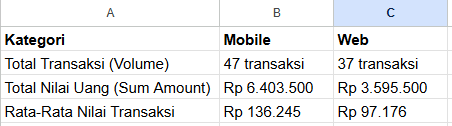

*   Mobile Jauh Lebih Aktif: Pengguna Mobile tidak hanya melakukan lebih banyak
transaksi secara keseluruhan (sekitar 56% dari total transaksi berhasil), tetapi mereka juga menyumbang 78% nilai uang lebih besar dibandingkan pengguna Web.
*   Pengguna Mobile Lebih Berani: Nilai rata-rata transaksi di Mobile juga lebih tinggi. Ini mengindikasikan bahwa transaksi-transaksi besar atau anomali yang baru saya temukan (seperti transfer jutaan rupiah) didominasi oleh pengguna yang mengakses melalui aplikasi Mobile. Mobile adalah channel yang dipercaya pengguna untuk interaksi finansial bernilai tinggi.

2. Kesamaan dalam Jenis Transaksi
Menariknya, meskipun volume Mobile lebih tinggi, pola jenis transaksi di kedua platform hampir sama.

*   Deposit Mendominasi: Baik pengguna Mobile maupun Web sama-sama paling sering melakukan transaksi Deposit (menabung/mengisi saldo), yang menunjukkan fungsi utama layanan ini adalah sebagai dompet atau akun pembayaran.
*   Withdrawal Seimbang: Jumlah transaksi Withdrawal (penarikan) yang berhasil di kedua platform adalah sama-sama 11 kali.

Tidak ada perbedaan perilaku yang menunjukkan bahwa pengguna Web secara khusus datang hanya untuk withdrawal atau sebaliknya. Kedua platform melayani fungsi finansial inti secara merata.

**Wawasan Menarik Lain: Risiko Kegagalan**

Saya menemukan satu insight menarik terkait kualitas layanan: Pengguna Mobile menghadapi risiko kegagalan transaksi yang jauh lebih tinggi daripada pengguna Web.
*   Mobile: Terdapat 5 transaksi gagal (Failed) dari log yang tersedia.
*   Web: Hanya 1 transaksi gagal yang tercatat.

Rekomendasi Tindak Lanjut:

Tim Product dan Engineering Mobile harus segera melakukan audit mendalam untuk mencari akar penyebab tingginya tingkat kegagalan ini. Masalahnya bisa berupa:


1.   Kualitas Koneksi: Apakah aplikasi tidak menoleransi koneksi jaringan yang buruk?
2.   Bug Aplikasi: Apakah ada bug spesifik pada proses checkout atau transaksi di aplikasi Mobile?
3.  Batasan Sistem: Apakah transaksi gagal karena limitasi sistem yang tidak terdeteksi oleh pengguna Mobile?

Mengatasi kegagalan ini dapat mendorong jumlah transaksi dan nilai total Mobile menjadi lebih tinggi lagi di masa yang akan datang.








In [ ]:
import pandas as pd
import io

# Data log transaksi yang disediakan (mengambil data_log lengkap)
data_log = """
Transaction_ID,User_ID,Location_ID,Transaction_Type,Amount_IDR,Transaction_Time,Status,Device_Type
T1,U101,L1,Deposit,50000,"2024-09-01 10:00:00",Success,Mobile
T2,U102,L2,Withdrawal,10000,"2024-09-01 10:05:00",Success,Web
T3,U103,L3,Deposit,150000,"2024-09-01 10:10:00",Success,Mobile
T4,U104,L1,Fee,5000,"2024-09-01 10:15:00",Success,Mobile
T5,U105,L4,Deposit,25000,"2024-09-01 10:20:00",Success,Web
T6,U101,L1,Withdrawal,20000,"2024-09-01 10:25:00",Success,Mobile
T7,U106,L5,Deposit,80000,"2024-09-02 11:00:00",Success,Mobile
T8,U107,L2,Withdrawal,30000,"2024-09-02 11:05:00",Failed,Mobile
T9,U108,L3,Deposit,100000,"2024-09-02 11:10:00",Success,Web
T10,U109,L4,Fee,7500,"2024-09-02 11:15:00",Success,Mobile
T11,U101,L1,Deposit,50000,"2024-09-03 12:00:00",Success,Mobile
T12,U102,L5,Withdrawal,15000,"2024-09-03 12:05:00",Success,Web
T13,U110,L2,Deposit,200000,"2024-09-03 12:10:00",Success,Mobile
T14,U111,L3,Fee,5000,"2024-09-03 12:15:00",Success,Mobile
T15,U112,L4,Deposit,35000,"2024-09-04 13:00:00",Success,Mobile
T16,U113,L1,Withdrawal,25000,"2024-09-04 13:05:00",Success,Web
T17,U114,L5,Deposit,120000,"2024-09-04 13:10:00",Success,Mobile
T18,U115,L2,Fee,6000,"2024-09-04 13:15:00",Success,Mobile
T19,U101,L3,Deposit,70000,"2024-09-05 14:00:00",Success,Mobile
T20,U116,L4,Withdrawal,40000,"2024-09-05 14:05:00",Success,Web
T21,U117,L5,Deposit,180000,"2024-09-06 15:00:00",Success,Mobile
T22,U118,L1,Fee,5000,"2024-09-06 15:05:00",Success,Mobile
T23,U119,L2,Deposit,60000,"2024-09-06 15:10:00",Success,Web
T24,U120,L3,Withdrawal,50000,"2024-09-07 16:00:00",Success,Mobile
T25,U121,L4,Deposit,90000,"2024-09-07 16:05:00",Success,Mobile
T26,U122,L5,Fee,7000,"2024-09-07 16:10:00",Success,Mobile
T27,U123,L1,Deposit,110000,"2024-09-08 17:00:00",Success,Web
T28,U124,L2,Withdrawal,60000,"2024-09-08 17:05:00",Failed,Mobile
T29,U125,L3,Deposit,40000,"2024-09-08 17:10:00",Success,Mobile
T30,U126,L4,Fee,5000,"2024-09-09 18:00:00",Success,Web
T31,U127,L5,Deposit,130000,"2024-09-09 18:05:00",Success,Mobile
T32,U128,L1,Withdrawal,70000,"2024-09-09 18:10:00",Success,Mobile
T33,U129,L2,Deposit,85000,"2024-09-10 19:00:00",Success,Mobile
T34,U130,L3,Fee,5000,"2024-09-10 19:05:00",Success,Web
T35,U131,L4,Deposit,190000,"2024-09-10 19:10:00",Success,Mobile
T36,U132,L5,Withdrawal,80000,"2024-09-11 20:00:00",Success,Mobile
T37,U133,L1,Deposit,95000,"2024-09-11 20:05:00",Success,Web
T38,U134,L2,Fee,5000,"2024-09-11 20:10:00",Success,Mobile
T39,U135,L3,Deposit,140000,"2024-09-12 21:00:00",Success,Mobile
T40,U136,L4,Withdrawal,90000,"2024-09-12 21:05:00",Success,Web
T41,U137,L5,Deposit,160000,"2024-09-13 22:00:00",Success,Mobile
T42,U138,L1,Fee,5000,"2024-09-13 22:05:00",Success,Mobile
T43,U139,L2,Deposit,75000,"2024-09-13 22:10:00",Success,Web
T44,U140,L3,Withdrawal,1000000,"2024-09-14 23:00:00",Success,Mobile
T45,U141,L4,Deposit,120000,"2024-09-14 23:05:00",Success,Mobile
T46,U142,L5,Fee,5000,"2024-09-14 23:10:00",Success,Web
T47,U143,L1,Deposit,220000,"2024-09-15 00:00:00",Success,Mobile
T48,U144,L2,Withdrawal,100000,"2024-09-15 00:05:00",Success,Mobile
T49,U145,L3,Deposit,45000,"2024-09-15 00:10:00",Success,Web
T50,U101,L1,Withdrawal,30000,"2024-09-15 00:15:00",Success,Mobile
T51,U146,L1,Deposit,500000,"2024-09-16 09:00:00",Success,Mobile
T52,U147,L2,Withdrawal,20000,"2024-09-16 09:05:00",Success,Web
T53,U148,L3,Deposit,300000,"2024-09-16 09:10:00",Failed,Mobile
T54,U149,L4,Fee,10000,"2024-09-16 09:15:00",Success,Mobile
T55,U150,L5,Deposit,1000000,"2024-09-17 10:00:00",Success,Web
T56,U151,L1,Withdrawal,90000,"2024-09-17 10:05:00",Success,Mobile
T57,U152,L2,Deposit,45000,"2024-09-17 10:10:00",Success,Web
T58,U153,L3,Fee,5000,"2024-09-17 10:15:00",Failed,Mobile
T59,U101,L1,Deposit,120000,"2024-09-18 11:00:00",Success,Web
T60,U154,L2,Withdrawal,30000,"2024-09-18 11:05:00",Success,Mobile
T61,U155,L3,Deposit,20000,"2024-09-18 11:10:00",Success,Mobile
T62,U156,L4,Deposit,900000,"2024-09-18 11:15:00",Success,Web
T63,U157,L5,Withdrawal,150000,"2024-09-19 12:00:00",Success,Mobile
T64,U158,L1,Fee,5000,"2024-09-19 12:05:00",Success,Mobile
T65,U159,L2,Deposit,250000,"2024-09-19 12:10:00",Success,Web
T66,U160,L3,Deposit,20000,"2024-09-20 13:00:00",Success,Mobile
T67,U161,L4,Withdrawal,100000,"2024-09-20 13:05:00",Success,Web
T68,U162,L5,Deposit,60000,"2024-09-20 13:10:00",Success,Mobile
T69,U101,L1,Withdrawal,50000,"2024-09-21 14:00:00",Success,Mobile
T70,U150,L5,Deposit,200000,"2024-09-21 14:05:00",Failed,Mobile
T71,U163,L2,Deposit,180000,"2024-09-22 08:00:00",Success,Mobile
T72,U164,L3,Withdrawal,75000,"2024-09-22 08:05:00",Success,Web
T73,U165,L4,Deposit,220000,"2024-09-22 08:10:00",Success,Mobile
T74,U166,L5,Fee,5000,"2024-09-22 08:15:00",Success,Mobile
T75,U167,L1,Deposit,100000,"2024-09-23 09:00:00",Success,Web
T76,U168,L2,Withdrawal,20000,"2024-09-23 09:05:00",Failed,Mobile
T77,U169,L3,Deposit,950000,"2024-09-23 09:10:00",Success,Mobile
T78,U170,L4,Deposit,50000,"2024-09-23 09:15:00",Pending,Web
T79,U171,L5,Fee,7000,"2024-09-24 10:00:00",Success,Mobile
T80,U172,L1,Withdrawal,250000,"2024-09-24 10:05:00",Success,Web
T81,U101,L2,Deposit,300000,"2024-09-24 10:10:00",Success,Mobile
T82,U173,L3,Deposit,45000,"2024-09-24 10:15:00",Success,Web
T83,U174,L4,Withdrawal,15000,"2024-09-25 11:00:00",Success,Mobile
T84,U175,L5,Deposit,600000,"2024-09-25 11:05:00",Success,Mobile
T85,U176,L1,Fee,5000,"2024-09-25 11:10:00",Success,Web
T86,U177,L2,Deposit,35000,"2024-09-26 12:00:00",Failed,Mobile
T87,U178,L3,Withdrawal,90000,"2024-09-26 12:05:00",Success,Mobile
T88,U179,L4,Deposit,50000,"2024-09-26 12:10:00",Success,Web
T89,U180,L5,Deposit,125000,"2024-09-27 13:00:00",Success,Mobile
T90,U181,L1,Withdrawal,50000,"2024-09-27 13:05:00",Success,Mobile
T91,U182,L2,Deposit,80000,"2024-09-27 13:10:00",Success,Web
T92,U183,L3,Withdrawal,25000,"2024-09-28 14:00:00",Pending,Mobile
T93,U184,L4,Deposit,900000,"2024-09-28 14:05:00",Success,Web
T94,U185,L5,Fee,5000,"2024-09-28 14:10:00",Success,Mobile
T95,U186,L1,Deposit,150000,"2024-09-29 15:00:00",Success,Mobile
T96,U187,L2,Withdrawal,60000,"2024-09-29 15:05:00",Failed,Web
T97,U188,L3,Deposit,300000,"2024-09-29 15:10:00",Success,Mobile
T98,U189,L4,Deposit,10000,"2024-09-29 15:15:00",Success,Mobile
T99,U190,L5,Fee,12000,"2024-09-30 16:00:00",Success,Web
T100,U101,L1,Deposit,500000,"2024-09-30 16:05:00",Success,Mobile
"""

# Membaca string data menjadi DataFrame
df_transactions = pd.read_csv(io.StringIO(data_log))

# FUNGSI TUGAS 5: DETEKSI ANOMALI IQR

# 1. Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
Q1 = df_transactions['Amount_IDR'].quantile(0.25)
Q3 = df_transactions['Amount_IDR'].quantile(0.75)

# 2. Hitung Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Definisikan Ambang Batas Atas (Upper Bound)
upper_bound = Q3 + 1.5 * IQR

# 4. Filter data untuk menemukan anomali
df_anomaly = df_transactions[df_transactions['Amount_IDR'] > upper_bound]

print(f"Q1 (25%): {Q1:,.0f} IDR")
print(f"Q3 (75%): {Q3:,.0f} IDR")
print(f"IQR: {IQR:,.0f} IDR")
print(f"Upper Bound (Ambang Batas Anomali): {upper_bound:,.0f} IDR")

# Tampilkan hasil anomali
if not df_anomaly.empty:
    print("\n ANOMALI BERHASIL DITEMUKAN:")
    # Filter hanya kolom yang diminta
    print(df_anomaly[['Transaction_ID', 'Amount_IDR', 'Transaction_Type']].to_markdown(index=False))
else:
    print("\nTidak ada anomali yang ditemukan di luar batas IQR 1.5.")

print("\n--- Justifikasi Anomali ---")
print("Transaksi dengan 'Amount_IDR' di atas Ambang Batas Atas (Upper Bound) yang dihitung dengan metode IQR dianggap anomali karena mereka secara signifikan lebih besar")
print("dari sebagian besar transaksi lain dalam dataset. Dalam konteks layanan ini, sebagian besar transaksi adalah deposit, penarikan, atau biaya dengan nilai relatif kecil.")
print("Nilai yang jauh melampaui batas atas IQR menunjukkan adanya transaksi yang tidak biasa atau sangat besar yang memerlukan perhatian lebih lanjut ")
print("untuk investigasi potensi kesalahan, penipuan, atau pola penggunaan yang tidak biasa.")

Q1 (25%): 20,000 IDR
Q3 (75%): 132,500 IDR
IQR: 112,500 IDR
Upper Bound (Ambang Batas Anomali): 301,250 IDR

 ANOMALI BERHASIL DITEMUKAN:
| Transaction_ID   |   Amount_IDR | Transaction_Type   |
|:-----------------|-------------:|:-------------------|
| T44              |      1000000 | Withdrawal         |
| T51              |       500000 | Deposit            |
| T55              |      1000000 | Deposit            |
| T62              |       900000 | Deposit            |
| T77              |       950000 | Deposit            |
| T84              |       600000 | Deposit            |
| T93              |       900000 | Deposit            |
| T100             |       500000 | Deposit            |

--- Justifikasi Anomali ---
Transaksi dengan 'Amount_IDR' di atas Ambang Batas Atas (Upper Bound) yang dihitung dengan metode IQR dianggap anomali karena mereka secara signifikan lebih besar
dari sebagian besar transaksi lain dalam dataset. Dalam konteks layanan ini, sebagian besar transaks

# **D. Database Design**

In [ ]:
import sqlite3
import os

# 1. MEMBUKA KONEKSI DATABASE
# Koneksi ke database
conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# Aktifkan Foreign Key Constraints.
cursor.execute('PRAGMA foreign_keys = ON;')

print(f"Sukses: Koneksi ke database '{DB_FILE}'.")
print("-" * 70)

# 2. EKSEKUSI DDL
def create_iot_schema():
    print("Membuat 5 tabel aset sesuai persyaratan...")

    # 1. ENGINEERS
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS Engineers (
        Engineer_ID INTEGER PRIMARY KEY,
        Engineer_Name VARCHAR(100) NOT NULL,
        Contact_Info VARCHAR(100)
    );""")
    print("   [1/5] Tabel Engineers berhasil dibuat.")

    # 2. LOCATIONS
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS Locations (
        Location_ID VARCHAR(10) PRIMARY KEY,
        Location_Name VARCHAR(100) NOT NULL,
        City VARCHAR(50) NOT NULL
    );""")
    print("   [2/5] Tabel Locations berhasil dibuat.")

    # 3. UNITS
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS Units (
        Unit_ID VARCHAR(15) PRIMARY KEY,
        Location_ID VARCHAR(10) NOT NULL,
        Unit_Name VARCHAR(50),
        Unit_Type VARCHAR(20),

        FOREIGN KEY (Location_ID) REFERENCES Locations(Location_ID)
    );""")
    print("   [3/5] Tabel Units berhasil dibuat.")

    # 4. SENSORS
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS Sensors (
        Sensor_ID VARCHAR(20) PRIMARY KEY,
        Sensor_Type VARCHAR(50) NOT NULL,
        Current_Status VARCHAR(20) NOT NULL,
        Unit_ID VARCHAR(15) NOT NULL,
        Installation_Date DATE,

        FOREIGN KEY (Unit_ID) REFERENCES Units(Unit_ID)
    );""")
    print("   [4/5] Tabel Sensors berhasil dibuat.")

    # 5. MAINTENANCE_LOG
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS Maintenance_Log (
        Maintenance_ID INTEGER PRIMARY KEY,
        Sensor_ID VARCHAR(20) NOT NULL,
        Engineer_ID INT NOT NULL,
        Maintenance_Date DATETIME NOT NULL,
        Description TEXT,

        FOREIGN KEY (Sensor_ID) REFERENCES Sensors(Sensor_ID),
        FOREIGN KEY (Engineer_ID) REFERENCES Engineers(Engineer_ID)
    );""")
    print("   [5/5] Tabel Maintenance_Log berhasil dibuat.")

    print("-" * 70)

# 3. EKSEKUSI DAN SIMPAN PERUBAHAN
create_iot_schema()

# Simpan perubahan
conn.commit()

print(" database berhasil dibuat ")

Sukses: Koneksi ke database 'bobobox_aset_iot.db'.
----------------------------------------------------------------------
Membuat 5 tabel aset sesuai persyaratan...
   [1/5] Tabel Engineers berhasil dibuat.
   [2/5] Tabel Locations berhasil dibuat.
   [3/5] Tabel Units berhasil dibuat.
   [4/5] Tabel Sensors berhasil dibuat.
   [5/5] Tabel Maintenance_Log berhasil dibuat.
----------------------------------------------------------------------
 database berhasil dibuat 


# **Sample Data**

In [ ]:
# INSERT data
import sqlite3
import pandas as pd
from datetime import datetime

# Asumsi: variabel 'conn' dan 'cursor' sudah didefinisikan dari cell DDL sebelumnya
# INSERT DATA SAMPEL
print("\n[INSERT] Memasukkan data baru...")

try:
    # 1. Engineers
    engineers_data = [
        ("Budi Santoso", "budi@bobobox.com"),
        ("Sinta Dewi", "sinta@bobobox.com"),
        ("Rizky Pratama", "rizky@bobobox.com")
    ]
    cursor.executemany("INSERT INTO Engineers (Engineer_Name, Contact_Info) VALUES (?, ?)", engineers_data)

    # 2. Locations
    locations_data = [
        ("LOC01", "Bobobox Pods Jakarta", "Jakarta"),
        ("LOC02", "Bobobox Cabin Bandung", "Bandung"),
    ]
    cursor.executemany("INSERT INTO Locations (Location_ID, Location_Name, City) VALUES (?, ?, ?)", locations_data)

    # 3. Units
    units_data = [
        ("U-JKT-101", "LOC01", "Pod JKT 101", "Pod"),
        ("U-BDG-205", "LOC02", "Cabin BDG 205", "Cabin"),
    ]
    cursor.executemany("INSERT INTO Units (Unit_ID, Location_ID, Unit_Name, Unit_Type) VALUES (?, ?, ?, ?)", units_data)

    # 4. Sensors
    sensors_data = [
        ("S-TEMP-001", "Temperature", "Active", "U-JKT-101", "2024-01-15"),
        ("S-OCCU-002", "Occupancy", "Error", "U-JKT-101", "2024-03-01"),
        ("S-HUMI-003", "Humidity", "Active", "U-BDG-205", "2024-02-20"),
    ]
    cursor.executemany("INSERT INTO Sensors (Sensor_ID, Sensor_Type, Current_Status, Unit_ID, Installation_Date) VALUES (?, ?, ?, ?, ?)", sensors_data)

    # 5. Maintenance_Log (Engineer_ID 1=Budi, 2=Sinta)
    maintenance_data = [
        (1, "S-TEMP-001", "2024-11-01 10:30:00", "Kalibrasi sensor suhu. Berhasil."),
        (2, "S-OCCU-002", "2024-11-05 15:00:00", "Ganti baterai. Status Error teratasi."),
    ]
    cursor.executemany("INSERT INTO Maintenance_Log (Engineer_ID, Sensor_ID, Maintenance_Date, Description) VALUES (?, ?, ?, ?)", maintenance_data)

    conn.commit() # Simpan semua perubahan
    print("\n Data sampel berhasil dimasukkan dan disimpan.")

except Exception as e:
    conn.rollback() # Batalkan transaksi jika ada error
    print(f" Error saat INSERT data: {e}. Transaksi di-Rollback.")

print("-" * 70)
print(" Data DML selesai. Koneksi masih aktif.")


[INSERT] Memasukkan data baru...

 Data sampel berhasil dimasukkan dan disimpan.
----------------------------------------------------------------------
 Data DML selesai. Koneksi masih aktif.


In [ ]:
import sqlite3
import pandas as pd

# FUNGSI UNTUK MENAMPILKAN DATA
def display_table_data(table_name, connection):
    """Mengambil data menggunakan Pandas dan menampilkan."""
    try:
        df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
        print(f"\n--- Data dari Tabel {table_name.upper()} ---")
        print(df.to_markdown(index=False))
    except Exception as e:
        print(f" Error menarik data dari {table_name}: {e}")

# EKSEKUSI PENARIKAN DATA
print("\n Menarik Data dari Semua Tabel:")

display_table_data("Locations", conn)
display_table_data("Units", conn)
display_table_data("Sensors", conn)
display_table_data("Engineers", conn)
display_table_data("Maintenance_Log", conn)

print("-" * 70)


 Menarik Data dari Semua Tabel:

--- Data dari Tabel LOCATIONS ---
| Location_ID   | Location_Name         | City    |
|:--------------|:----------------------|:--------|
| LOC01         | Bobobox Pods Jakarta  | Jakarta |
| LOC02         | Bobobox Cabin Bandung | Bandung |

--- Data dari Tabel UNITS ---
| Unit_ID   | Location_ID   | Unit_Name     | Unit_Type   |
|:----------|:--------------|:--------------|:------------|
| U-JKT-101 | LOC01         | Pod JKT 101   | Pod         |
| U-BDG-205 | LOC02         | Cabin BDG 205 | Cabin       |

--- Data dari Tabel SENSORS ---
| Sensor_ID   | Sensor_Type   | Current_Status   | Unit_ID   | Installation_Date   |
|:------------|:--------------|:-----------------|:----------|:--------------------|
| S-TEMP-001  | Temperature   | Active           | U-JKT-101 | 2024-01-15          |
| S-OCCU-002  | Occupancy     | Error            | U-JKT-101 | 2024-03-01          |
| S-HUMI-003  | Humidity      | Active           | U-BDG-205 | 2024-02-20       